In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import os
import glob
from pandas import DataFrame


import matplotlib as mpl
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

In [8]:
str1

,닉네임,댓글,좋아요수
날짜,,,
['2020. 6. 1.'],ITSub잇섭,하.. 언제 오타 안내지 ㅠㅠ\n00:51 - 2000년이 아니라 2009년 입니다...,768개
['2020. 6. 1.'],motti,당시에 프라다폰 썼는데 진짜 디자인은 갑오브 갑이었습니다. 지금봐도 촌스럽지않고 예...,21개
['2020. 6. 1.'],daradarasan,시대를 앞서 갔는데... 링크보면 지금도 가지고 싶어,19개
['2020. 6. 1.'],최성일,10년전 제품를 사고싶게 만드는 잇섭의 초능력!ㅎㅎㅎ,57개
['2020. 6. 1.'],문선동,13:28김칰ㅋㅋㅋ좀ㅋㅋㅋㅋ줄ㅋ랰ㅋㅋㅋㅋㅋㅋㅋ,42개
...,...,...,...
['2020. 5. 14.'],호롤롤로,진짜 이 안동상남자는 매력이 너무 넘친다,1개
['2020. 5. 14.'],moreBe,Ui 진짜 잘뺐다.. 지금봐도 괜찮네,0개
['2020. 5. 14.'],까꿍,뭔가 느끼는게 많다ㅜㅜ,0개


In [7]:
str1 = pd.read_csv("ITSub잇섭_IT1/result.csv",index_col="날짜")
str1[str1['댓글'].str.contains("노트")]

,닉네임,댓글,좋아요수
날짜,,,
['2020. 6. 1.'],촌놈,잇섭형 영상보면서 느끼는건데 영상비율이 난 너무 좋아\n노트10 쓰는데 다른 영상들...,15개
['2020. 6. 1.'],코목,"우리집 완전 고물 창고인데ㅋㅋㅋ\n옵티머스 lte 2랑 베가 시크릿2, 갤럭시노트2...",13개
['2020. 5. 11.'],NevIT네빗,형 벨벳... 그리고 긱바 AERO노트북.. 제발 ㅠㅠ,2개
['2020. 5. 11.'],바다고기,내 노트8에는 노크온 기능이 없는데 ㅋㅋㅋ,2개
['2020. 5. 11.'],유레카,노트 10+에서 번역기능 과제할때 잘 씀ㅋㅋㅋㅋㅋㅋ,0개
...,...,...,...
['2020. 5. 14.'],BiniDLim,안테나 터미널 단자 맞을겁니다. 노트북 와이파이 무선랜용 단자와는 파이수가 다른 물...,856개
['2020. 5. 14.'],Wayne2157,"펜텍ㅠㅜ 펜텍것만 R3, 아이언, 시크릿 노트 3개 사용했어서 나름의 애정이 있었는...",65개
['2020. 5. 14.'],이승준,"베가 시크릿노트2공학용과 일반시판용, 브루클린 2대, im-a940k 들고 있습니다...",239개


In [10]:
str1["count"]=str1["댓글"].str.contains("노트")
str1

,닉네임,댓글,좋아요수,count
날짜,,,,
['2020. 6. 1.'],ITSub잇섭,하.. 언제 오타 안내지 ㅠㅠ\n00:51 - 2000년이 아니라 2009년 입니다...,768개,False
['2020. 6. 1.'],motti,당시에 프라다폰 썼는데 진짜 디자인은 갑오브 갑이었습니다. 지금봐도 촌스럽지않고 예...,21개,False
['2020. 6. 1.'],daradarasan,시대를 앞서 갔는데... 링크보면 지금도 가지고 싶어,19개,False
['2020. 6. 1.'],최성일,10년전 제품를 사고싶게 만드는 잇섭의 초능력!ㅎㅎㅎ,57개,False
['2020. 6. 1.'],문선동,13:28김칰ㅋㅋㅋ좀ㅋㅋㅋㅋ줄ㅋ랰ㅋㅋㅋㅋㅋㅋㅋ,42개,False
...,...,...,...,...
['2020. 5. 14.'],호롤롤로,진짜 이 안동상남자는 매력이 너무 넘친다,1개,False
['2020. 5. 14.'],moreBe,Ui 진짜 잘뺐다.. 지금봐도 괜찮네,0개,False
['2020. 5. 14.'],까꿍,뭔가 느끼는게 많다ㅜㅜ,0개,False


In [12]:
list1 = np.array(str1["댓글"].str.contains("노트"))
list1*1
str1["count2"]=list1*1
str1

,닉네임,댓글,좋아요수,count,count2
날짜,,,,,
['2020. 6. 1.'],ITSub잇섭,하.. 언제 오타 안내지 ㅠㅠ\n00:51 - 2000년이 아니라 2009년 입니다...,768개,False,0
['2020. 6. 1.'],motti,당시에 프라다폰 썼는데 진짜 디자인은 갑오브 갑이었습니다. 지금봐도 촌스럽지않고 예...,21개,False,0
['2020. 6. 1.'],daradarasan,시대를 앞서 갔는데... 링크보면 지금도 가지고 싶어,19개,False,0
['2020. 6. 1.'],최성일,10년전 제품를 사고싶게 만드는 잇섭의 초능력!ㅎㅎㅎ,57개,False,0
['2020. 6. 1.'],문선동,13:28김칰ㅋㅋㅋ좀ㅋㅋㅋㅋ줄ㅋ랰ㅋㅋㅋㅋㅋㅋㅋ,42개,False,0
...,...,...,...,...,...
['2020. 5. 14.'],호롤롤로,진짜 이 안동상남자는 매력이 너무 넘친다,1개,False,0
['2020. 5. 14.'],moreBe,Ui 진짜 잘뺐다.. 지금봐도 괜찮네,0개,False,0
['2020. 5. 14.'],까꿍,뭔가 느끼는게 많다ㅜㅜ,0개,False,0


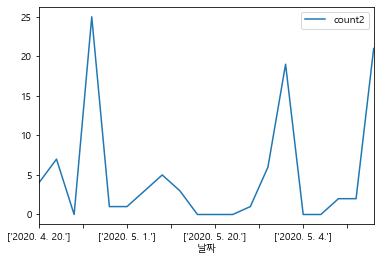

In [24]:
pdf=str1.pivot_table(values="count2",index="날짜",aggfunc="sum")
pdf.plot()


In [29]:
df= pd.read_csv("뷰티리스트.csv", encoding="cp949")
name_list=df['이름'].values
name_list
allData=[]
for name in name_list:
    df =pd.read_csv(f"{name}/result.csv")
    allData.append(df)
    
allData

dataCombine = pd.concat(allData,axis=0, ignore_index= True)
dataCombine.to_csv("test.csv", index=False,encoding = 'utf-8-sig')